In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
df=pd.read_excel('Online.csv')

In [3]:
df

,Unnamed: 0,order_status,Monthly Income,latitude,Marital Status,Gender,employment_status,Family size,Reviews,Pin code,Age,longitude,Educational Qualifications,Unnamed: 13,9,#@%
0,0,Yes,25001 to 50000,13.0262,Married,Male,Employee,5.0,Positive,560045,28.0,77.6200,Post Graduate,Yes,NaN,swiggyscount
1,1,Yes,No Income,12.9770,Single,Male,Student,NaN,Positive,560009,NaN,77.5773,Post Graduate,Yes,NaN,*7435
2,2,Yes,No Income,12.9770,Single,Female,Student,NaN,Positive,560009,NaN,77.5773,Post Graduate,Yes,NaN,*7435
3,3,Yes,No Income,13.0019,Single,Female,Student,NaN,Positive,560003,NaN,77.5713,Post Graduate,Yes,NaN,*7435
4,4,Yes,More than 50000,13.0626,Married,Male,Self Employeed,NaN,Positive,560015,NaN,77.5284,School,Yes,NaN,*7435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,383,Yes,No Income,12.9883,Single,Female,Student,5.0,Positive,560051,24.0,77.5987,Post Graduate,Yes,NaN,NaN
384,384,Yes,No Income,13.0223,Single,Male,Student,3.0,Positive,560049,23.0,77.7132,Graduate,Yes,NaN,NaN
385,385,Yes,10001 to 25000,12.9850,Single,Female,Student,5.0,Positive,560010,22.0,77.5533,Post Graduate,Yes,NaN,NaN
386,386,Yes,10001 to 25000,12.9698,Single,Female,Employee,3.0,Positive,560066,22.0,77.7500,Graduate,Yes,NaN,NaN


In [4]:
df.head()

,Unnamed: 0,order_status,Monthly Income,latitude,Marital Status,Gender,employment_status,Family size,Reviews,Pin code,Age,longitude,Educational Qualifications,Unnamed: 13,9,#@%
0,0,Yes,25001 to 50000,13.0262,Married,Male,Employee,5.0,Positive,560045,28.0,77.6200,Post Graduate,Yes,NaN,swiggyscount
1,1,Yes,No Income,12.9770,Single,Male,Student,NaN,Positive,560009,NaN,77.5773,Post Graduate,Yes,NaN,*7435
2,2,Yes,No Income,12.9770,Single,Female,Student,NaN,Positive,560009,NaN,77.5773,Post Graduate,Yes,NaN,*7435
3,3,Yes,No Income,13.0019,Single,Female,Student,NaN,Positive,560003,NaN,77.5713,Post Graduate,Yes,NaN,*7435
4,4,Yes,More than 50000,13.0626,Married,Male,Self Employeed,NaN,Positive,560015,NaN,77.5284,School,Yes,NaN,*7435


In [5]:
df.isnull().sum()

Unnamed: 0                      0
order_status                    0
Monthly Income                  0
latitude                        0
Marital Status                  0
Gender                          0
employment_status               0
Family size                    19
Reviews                         0
Pin code                        0
Age                            19
longitude                       0
Educational Qualifications      0
Unnamed: 13                     0
9                             388
#@%                           382
dtype: int64

In [6]:
df['Family size'].value_counts()

Family size
3.0    112
2.0     95
4.0     60
5.0     51
6.0     29
1.0     22
Name: count, dtype: int64

<Axes: ylabel='Family size'>

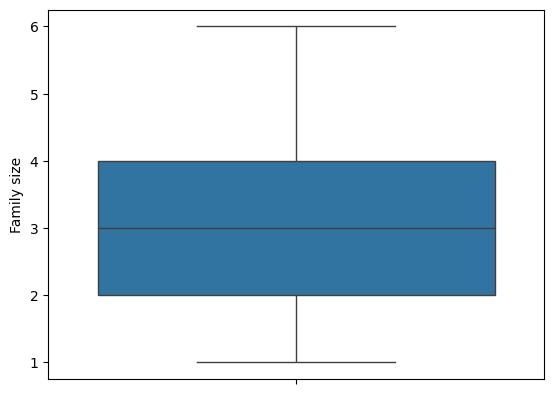

In [7]:
sns.boxplot(df['Family size'])

<Axes: ylabel='Age'>

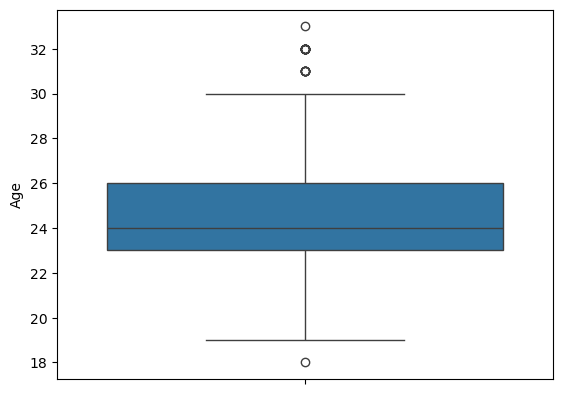

In [8]:
sns.boxplot(df['Age'])

In [9]:
df['Family size']=df['Family size'].fillna(df['Family size'].mean())
df['Age']=df['Age'].fillna(df['Age'].median())
df=df.drop(columns=['Unnamed: 0','Unnamed: 13',9,'#@%'])

In [10]:
#its now remove outkayers
df['Age'].describe()

count    388.000000
mean      24.634021
std        2.897932
min       18.000000
25%       23.000000
50%       24.000000
75%       26.000000
max       33.000000
Name: Age, dtype: float64

In [11]:
q1=df['Age'].describe()['25%']
q3=df['Age'].describe()['75%']
iqr=q3-q1
lb=q1-1.5*iqr
ub=q3+1.5*iqr
df['Age']=df['Age'].clip(lb,ub)

<Axes: ylabel='Age'>

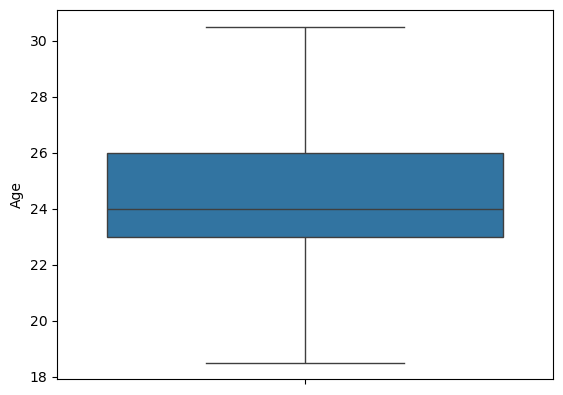

In [12]:
sns.boxplot(df['Age'])

In [13]:
df

,order_status,Monthly Income,latitude,Marital Status,Gender,employment_status,Family size,Reviews,Pin code,Age,longitude,Educational Qualifications
0,Yes,25001 to 50000,13.0262,Married,Male,Employee,5.000000,Positive,560045,28.0,77.6200,Post Graduate
1,Yes,No Income,12.9770,Single,Male,Student,3.298103,Positive,560009,24.0,77.5773,Post Graduate
2,Yes,No Income,12.9770,Single,Female,Student,3.298103,Positive,560009,24.0,77.5773,Post Graduate
3,Yes,No Income,13.0019,Single,Female,Student,3.298103,Positive,560003,24.0,77.5713,Post Graduate
4,Yes,More than 50000,13.0626,Married,Male,Self Employeed,3.298103,Positive,560015,24.0,77.5284,School
...,...,...,...,...,...,...,...,...,...,...,...,...
383,Yes,No Income,12.9883,Single,Female,Student,5.000000,Positive,560051,24.0,77.5987,Post Graduate
384,Yes,No Income,13.0223,Single,Male,Student,3.000000,Positive,560049,23.0,77.7132,Graduate
385,Yes,10001 to 25000,12.9850,Single,Female,Student,5.000000,Positive,560010,22.0,77.5533,Post Graduate
386,Yes,10001 to 25000,12.9698,Single,Female,Employee,3.000000,Positive,560066,22.0,77.7500,Graduate


* Encoding-converting categorical data into numerical data this called as encoding:
  
* 1) NOMINAL (who has no natural order):
     ex:a) male, female
        b) india,usa,pakistan,china..
     
* 2) Ordinal (which has natural order)
   * ex: Educational Qualifications:
     Graduate         177
     Post Graduate    174
     Ph.D              23
     School            12
     Uneducated         2

In [14]:
df['Educational Qualifications'].value_counts()

Educational Qualifications
Graduate         177
Post Graduate    174
Ph.D              23
School            12
Uneducated         2
Name: count, dtype: int64

In [15]:
df.columns

Index(['order_status', 'Monthly Income', 'latitude', 'Marital Status',
       'Gender', 'employment_status', 'Family size', 'Reviews', 'Pin code',
       'Age', 'longitude', 'Educational Qualifications'],
      dtype='object')

In [16]:
#one-hot encoding:
df=pd.get_dummies(df,columns=['Gender','Marital Status','employment_status'],dtype='int64')

In [17]:
df

,order_status,Monthly Income,latitude,Family size,Reviews,Pin code,Age,longitude,Educational Qualifications,Gender_Female,Gender_Male,Marital Status_Married,Marital Status_Prefer not to say,Marital Status_Single,employment_status_Employee,employment_status_House wife,employment_status_Self Employeed,employment_status_Student
0,Yes,25001 to 50000,13.0262,5.000000,Positive,560045,28.0,77.6200,Post Graduate,0,1,1,0,0,1,0,0,0
1,Yes,No Income,12.9770,3.298103,Positive,560009,24.0,77.5773,Post Graduate,0,1,0,0,1,0,0,0,1
2,Yes,No Income,12.9770,3.298103,Positive,560009,24.0,77.5773,Post Graduate,1,0,0,0,1,0,0,0,1
3,Yes,No Income,13.0019,3.298103,Positive,560003,24.0,77.5713,Post Graduate,1,0,0,0,1,0,0,0,1
4,Yes,More than 50000,13.0626,3.298103,Positive,560015,24.0,77.5284,School,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,Yes,No Income,12.9883,5.000000,Positive,560051,24.0,77.5987,Post Graduate,1,0,0,0,1,0,0,0,1
384,Yes,No Income,13.0223,3.000000,Positive,560049,23.0,77.7132,Graduate,0,1,0,0,1,0,0,0,1
385,Yes,10001 to 25000,12.9850,5.000000,Positive,560010,22.0,77.5533,Post Graduate,1,0,0,0,1,0,0,0,1
386,Yes,10001 to 25000,12.9698,3.000000,Positive,560066,22.0,77.7500,Graduate,1,0,0,0,1,1,0,0,0


In [18]:
# remove unnecessary spaces:so remove this..
df['Reviews']=df['Reviews'].str.strip()

In [19]:
df['Monthly Income']=df['Monthly Income'].str.strip()
df['Educational Qualifications']=df['Educational Qualifications'].str.strip()

In [20]:
df['Reviews'].value_counts()

Reviews
Positive    317
Negative     71
Name: count, dtype: int64

In [21]:
review_dict={"Positive":1,"Negative":0}
df['Reviews']=df['Reviews'].map(review_dict)

In [22]:
df

,order_status,Monthly Income,latitude,Family size,Reviews,Pin code,Age,longitude,Educational Qualifications,Gender_Female,Gender_Male,Marital Status_Married,Marital Status_Prefer not to say,Marital Status_Single,employment_status_Employee,employment_status_House wife,employment_status_Self Employeed,employment_status_Student
0,Yes,25001 to 50000,13.0262,5.000000,1,560045,28.0,77.6200,Post Graduate,0,1,1,0,0,1,0,0,0
1,Yes,No Income,12.9770,3.298103,1,560009,24.0,77.5773,Post Graduate,0,1,0,0,1,0,0,0,1
2,Yes,No Income,12.9770,3.298103,1,560009,24.0,77.5773,Post Graduate,1,0,0,0,1,0,0,0,1
3,Yes,No Income,13.0019,3.298103,1,560003,24.0,77.5713,Post Graduate,1,0,0,0,1,0,0,0,1
4,Yes,More than 50000,13.0626,3.298103,1,560015,24.0,77.5284,School,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,Yes,No Income,12.9883,5.000000,1,560051,24.0,77.5987,Post Graduate,1,0,0,0,1,0,0,0,1
384,Yes,No Income,13.0223,3.000000,1,560049,23.0,77.7132,Graduate,0,1,0,0,1,0,0,0,1
385,Yes,10001 to 25000,12.9850,5.000000,1,560010,22.0,77.5533,Post Graduate,1,0,0,0,1,0,0,0,1
386,Yes,10001 to 25000,12.9698,3.000000,1,560066,22.0,77.7500,Graduate,1,0,0,0,1,1,0,0,0


In [23]:
df['Monthly Income'].value_counts()

Monthly Income
No Income          187
25001 to 50000      69
More than 50000     62
10001 to 25000      45
Below Rs.10000      25
Name: count, dtype: int64

In [24]:
incom_dict={'No Income':1,
'Below Rs.10000':2,'10001 to 25000':3,'25001 to 50000':4,'More than 50000':5}
df['Monthly Income']=df['Monthly Income'].map(incom_dict)

In [25]:
df

,order_status,Monthly Income,latitude,Family size,Reviews,Pin code,Age,longitude,Educational Qualifications,Gender_Female,Gender_Male,Marital Status_Married,Marital Status_Prefer not to say,Marital Status_Single,employment_status_Employee,employment_status_House wife,employment_status_Self Employeed,employment_status_Student
0,Yes,4,13.0262,5.000000,1,560045,28.0,77.6200,Post Graduate,0,1,1,0,0,1,0,0,0
1,Yes,1,12.9770,3.298103,1,560009,24.0,77.5773,Post Graduate,0,1,0,0,1,0,0,0,1
2,Yes,1,12.9770,3.298103,1,560009,24.0,77.5773,Post Graduate,1,0,0,0,1,0,0,0,1
3,Yes,1,13.0019,3.298103,1,560003,24.0,77.5713,Post Graduate,1,0,0,0,1,0,0,0,1
4,Yes,5,13.0626,3.298103,1,560015,24.0,77.5284,School,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,Yes,1,12.9883,5.000000,1,560051,24.0,77.5987,Post Graduate,1,0,0,0,1,0,0,0,1
384,Yes,1,13.0223,3.000000,1,560049,23.0,77.7132,Graduate,0,1,0,0,1,0,0,0,1
385,Yes,3,12.9850,5.000000,1,560010,22.0,77.5533,Post Graduate,1,0,0,0,1,0,0,0,1
386,Yes,3,12.9698,3.000000,1,560066,22.0,77.7500,Graduate,1,0,0,0,1,1,0,0,0


In [26]:

df['Educational Qualifications'].value_counts()

Educational Qualifications
Graduate         177
Post Graduate    174
Ph.D              23
School            12
Uneducated         2
Name: count, dtype: int64

In [27]:
education_dict={
    "Uneducated" : 1,
    "School" : 2,
    "Ph.D" : 3,
    "Post Graduate" : 4,
    "Graduate" : 5}
df['Educational Qualifications']=df['Educational Qualifications'].map(education_dict)

In [29]:
orderstatus_dict={'Yes':1,'No':0}
df['order_status']=df['order_status'].map(orderstatus_dict)

In [30]:
df

,order_status,Monthly Income,latitude,Family size,Reviews,Pin code,Age,longitude,Educational Qualifications,Gender_Female,Gender_Male,Marital Status_Married,Marital Status_Prefer not to say,Marital Status_Single,employment_status_Employee,employment_status_House wife,employment_status_Self Employeed,employment_status_Student
0,1,4,13.0262,5.000000,1,560045,28.0,77.6200,4,0,1,1,0,0,1,0,0,0
1,1,1,12.9770,3.298103,1,560009,24.0,77.5773,4,0,1,0,0,1,0,0,0,1
2,1,1,12.9770,3.298103,1,560009,24.0,77.5773,4,1,0,0,0,1,0,0,0,1
3,1,1,13.0019,3.298103,1,560003,24.0,77.5713,4,1,0,0,0,1,0,0,0,1
4,1,5,13.0626,3.298103,1,560015,24.0,77.5284,2,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,1,1,12.9883,5.000000,1,560051,24.0,77.5987,4,1,0,0,0,1,0,0,0,1
384,1,1,13.0223,3.000000,1,560049,23.0,77.7132,5,0,1,0,0,1,0,0,0,1
385,1,3,12.9850,5.000000,1,560010,22.0,77.5533,4,1,0,0,0,1,0,0,0,1
386,1,3,12.9698,3.000000,1,560066,22.0,77.7500,5,1,0,0,0,1,1,0,0,0
